# Projet : Outils de programmation avancée pour l’IA

Les données utilisées proviennent des campagnes de marketing téléphonique menées par une banque portugaise. Elles contiennent des informations variées, notamment des caractéristiques socio-démographiques des clients, leur situation financière, ainsi que des indicateurs économiques.

L'objectif est de développer un modèle de prédiction afin d'optimiser les campagnes de démarchage marketing, qui nécessitent souvent plusieurs appels. Ces démarches peuvent être chronophages et entraîner des coûts financiers importants. Notre principal objectif est donc de réduire le nombre d'appels nécessaires en identifiant et en ciblant les clients les plus susceptibles de souscrire à l'offre.

La variable cible y est une variable binaire qui prend les valeurs "yes" ou "no".

Vous trouverez, dans le fichier ZIP contenant ce notebook, un document détaillant les différentes variables utilisées ainsi qu'un rapport résumant les étapes et mettant une conclusion à ce projet.



In [36]:
#Importation des librairies nécéssaires
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,  confusion_matrix, f1_score, accuracy_score, roc_curve, roc_auc_score,precision_recall_curve

In [2]:
pip install xgboost lightgbm catboost imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


In [4]:
#Importation des données
df = pd.read_csv('/content/bank-additional-full.csv', sep = ';')

# 1 - EDA ( Exploratory Data Analysis )


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
#Statistique descriptive des variables

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
df.nunique()

,0
age,78
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5


Il n'y a pas de valeurs manquantes, car elles ont été encodées au préalable sous la valeur 'unknown'. C'est cette valeur 'unknown' que nous chercherons et traiterons par la suite.

In [ ]:
# Affichage des valeurs manquantes
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
# Calculer le nombre de unknown dans chaque colonne
unknown_percentages = (df == 'unknown').mean() * 100

# calculer le nombre de unknown dans chaque ligne
unknown_percentages_in_rows = (df == 'unknown').mean(axis=1) * 100

# recherche de la ligne avec le plus haut pourcentage de unknown
column_with_highest_percentage = unknown_percentages.idxmax()
highest_percentage_column = unknown_percentages.max()

# recherche de la ligne avec le plus haut pourcentage de unknown
row_with_highest_percentage = unknown_percentages_in_rows.idxmax()
highest_percentage_row = unknown_percentages_in_rows.max()

print("Pourcentage de unknown dans chaque colonne:")
print(unknown_percentages)
print("\nPourcentage de unknown dans chaque ligne:")
print(unknown_percentages_in_rows)
print("\nColonne avec le plus haut pourcentage de unknown:")
print(f"Colonne: {column_with_highest_percentage}, Pourcentage: {highest_percentage_column:.2f}%")
print("\nLigne avec le pourcentage le plus important de unknown:")
print(f"Ligne: {row_with_highest_percentage}, Pourcentage: {highest_percentage_row:.2f}%")

Pourcentage de unknown dans chaque colonne:
age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

Pourcentage de unknown dans chaque ligne:
0        0.000000
1        4.761905
2        0.000000
3        0.000000
4        0.000000
           ...   
41183    0.000000
41184    0.000000
41185    0.000000
41186    0.000000
41187    0.000000
Length: 41188, dtype: float64

Colonne avec le plus haut pourcentage de unknown:
Colonne: default, Pourcentage: 

J'ai réalisé une visualisation sous forme de diagrammes en barres afin d'observer la distribution des variables qualitatives.

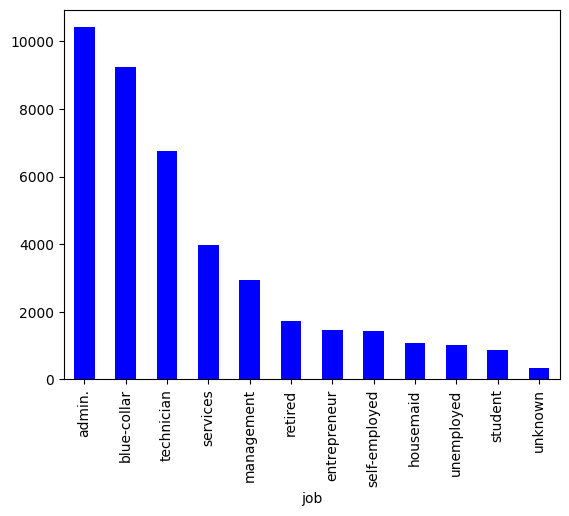

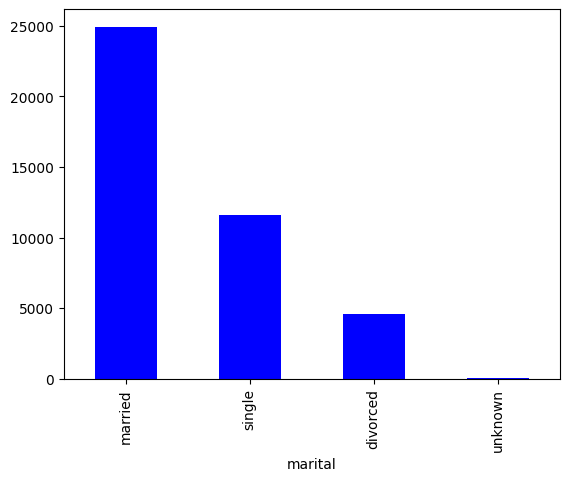

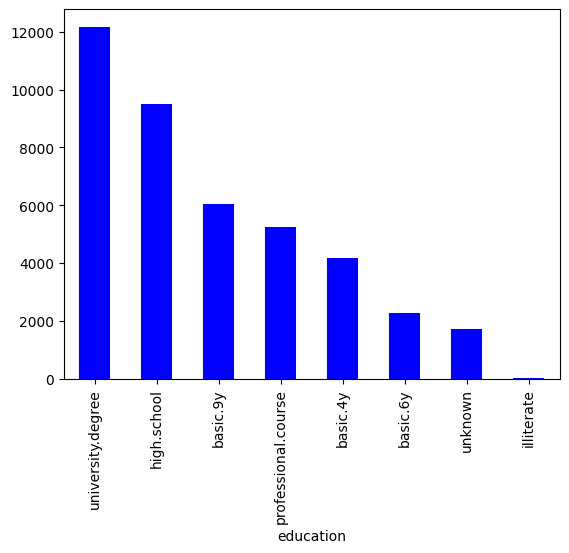

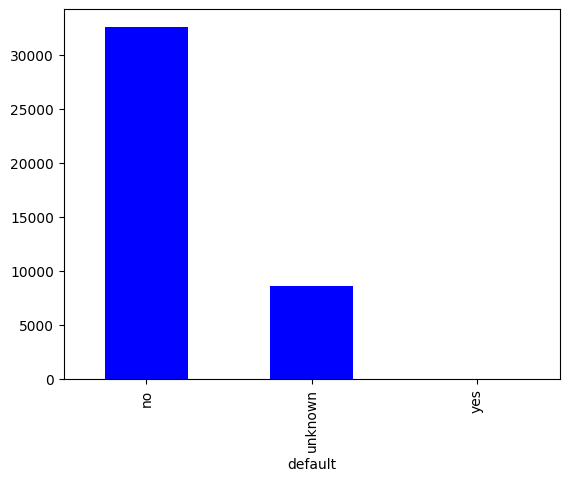

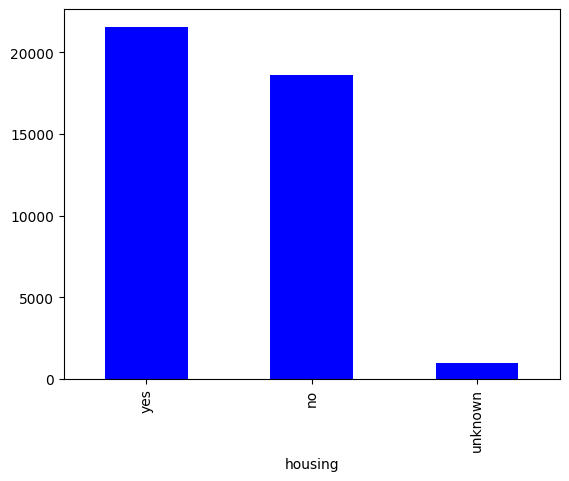

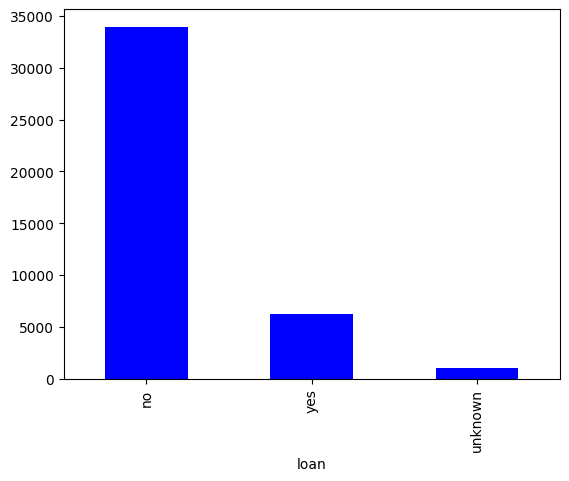

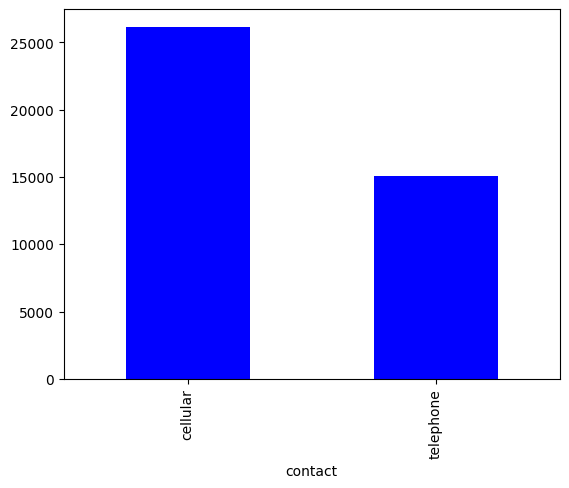

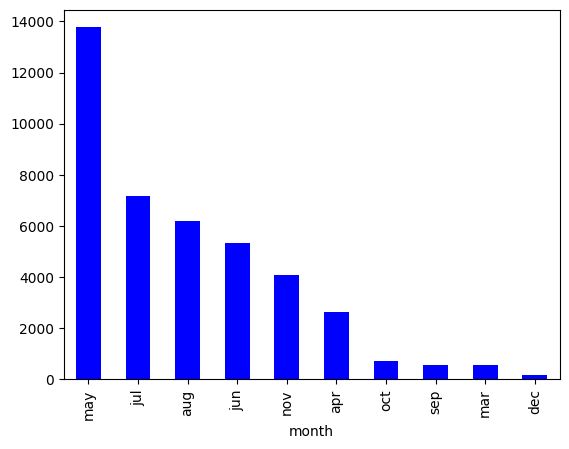

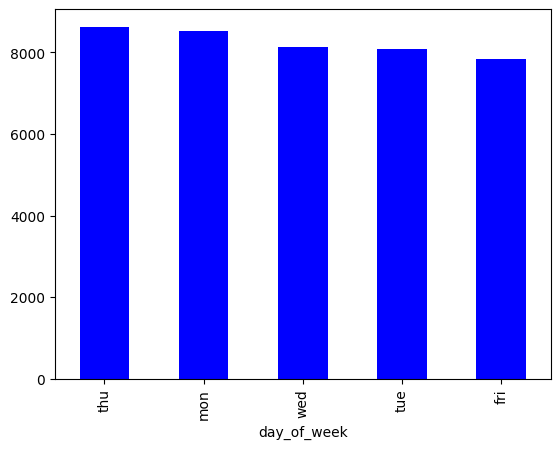

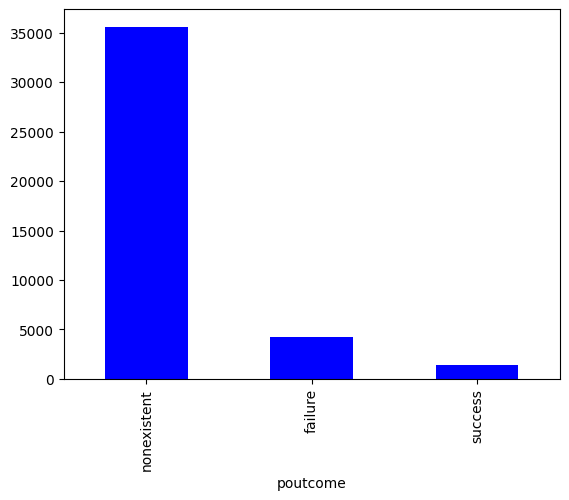

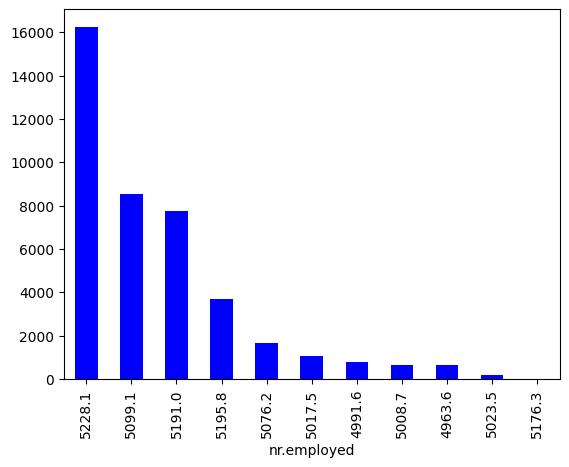

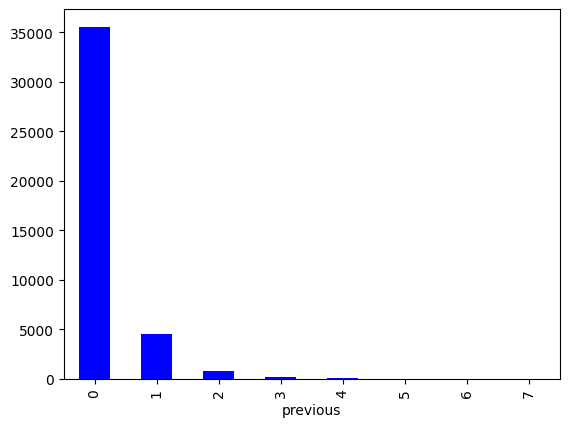

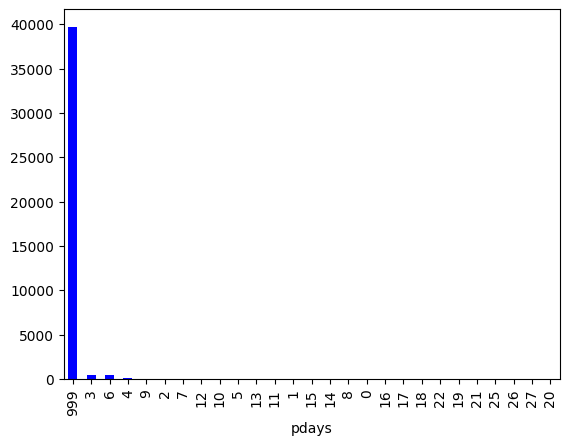

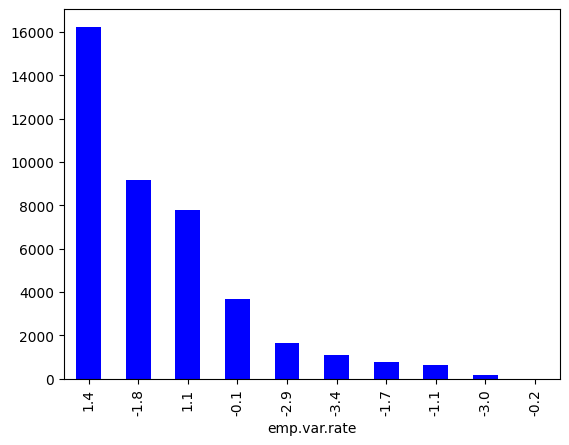

In [5]:
cat_col = ['job',	'marital',	'education',	'default',	'housing',
           'loan',	'contact',	'month',	'day_of_week',	'poutcome' ,'nr.employed',
           'previous'
           ,'pdays' ,'emp.var.rate'
           ]


for col in cat_col:
  distribution = df[col].value_counts()
  distribution.plot(kind = 'bar',color = 'blue')
  plt.show()

On peut constater qu'il y a un déséquilibre entre les deux classes à prédire, ce qui signifie que nous aurons probablement besoin de réaliser une augmentation des données afin de rééquilibrer les classes.


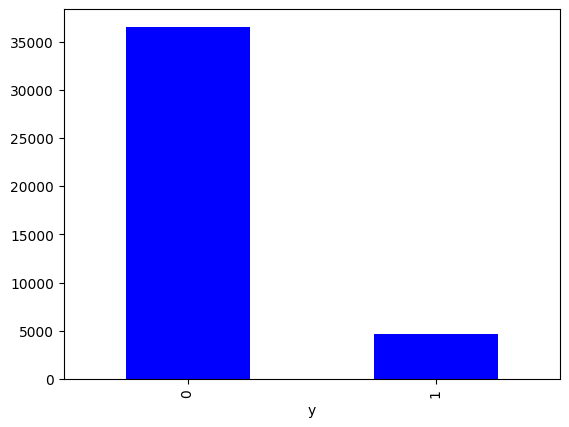

In [ ]:
distribution = df['y'].value_counts()
distribution.plot(kind = 'bar',color = 'blue')
plt.show()

J'ai réalisé des boîtes à moustaches sur les variables quantitatives afin d'obtenir un aperçu de ces variables, en mettant particulièrement l'accent sur la présence d'outliers.

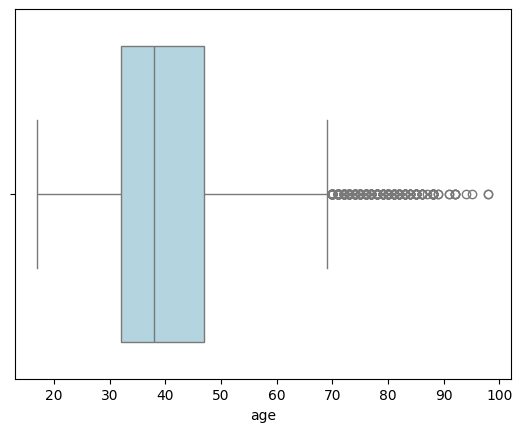

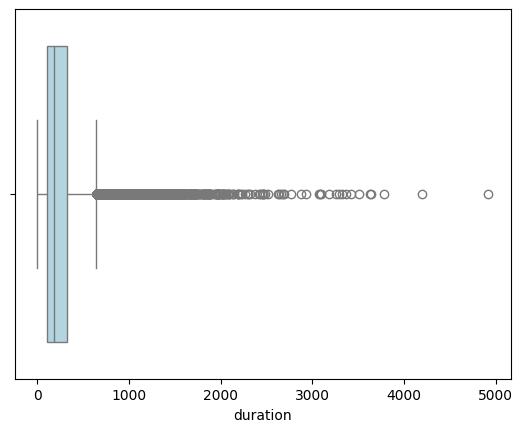

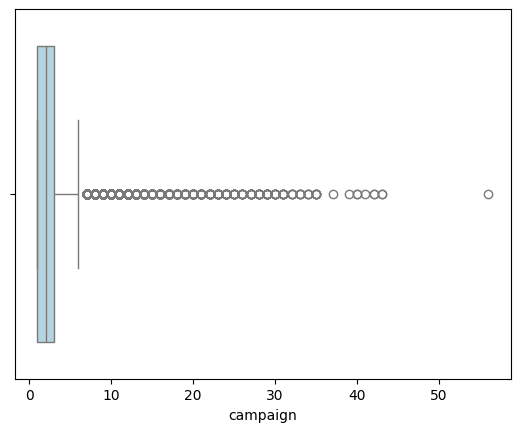

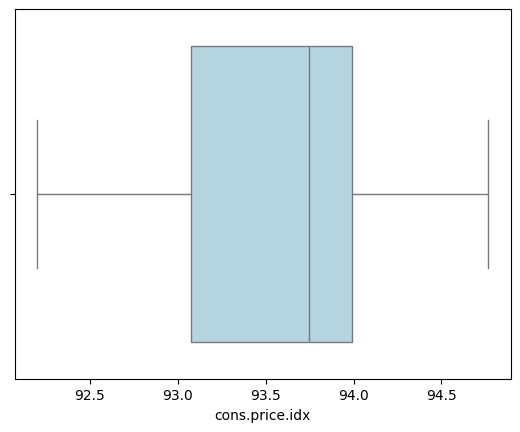

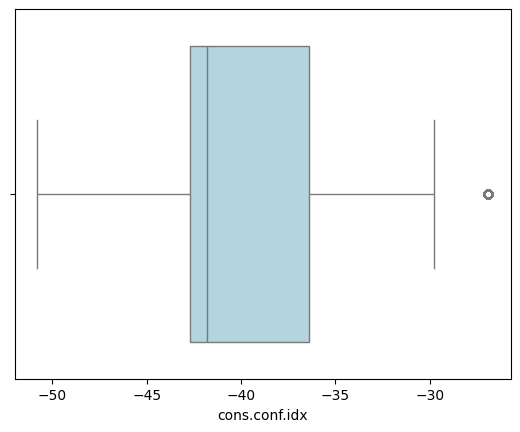

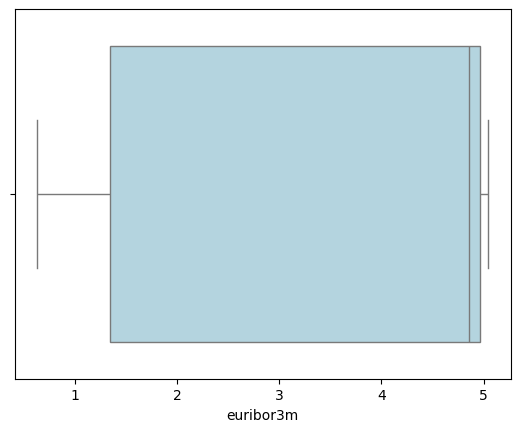

In [6]:
 df_num = [col for col in df.columns if col not in cat_col]
 df_num.remove('y')

 for col in df_num:
  sns.boxplot(x = df[col],color = 'lightblue')
  plt.show()



## Relation entres les variables quantitatives :

J'ai réalisé une matrice de corrélation. Mis à part pour les variables cons.price.idx et euribor3m qui présentent une forte corrélation positive, il ne semble pas y avoir d'autres corrélations significatives entre les différentes variables.

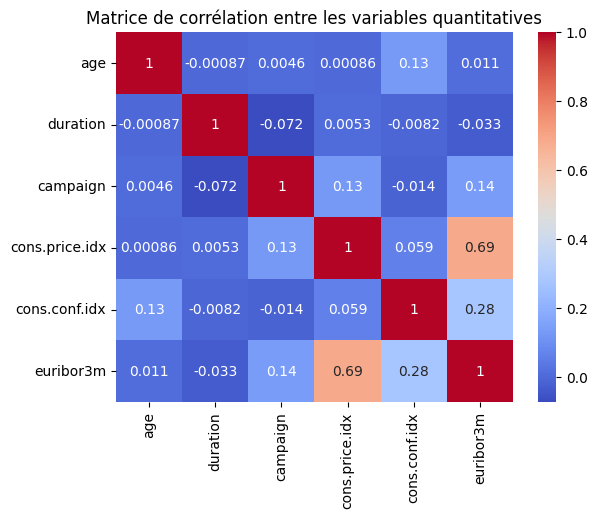

In [ ]:
correlation_matrix = df[df_num].corr()

# Visualisation de la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation entre les variables quantitatives")
plt.show()

Il semblerait que les personnes contactées sur leur téléphone cellulaire soient légèrement plus susceptibles de souscrire à une offre.

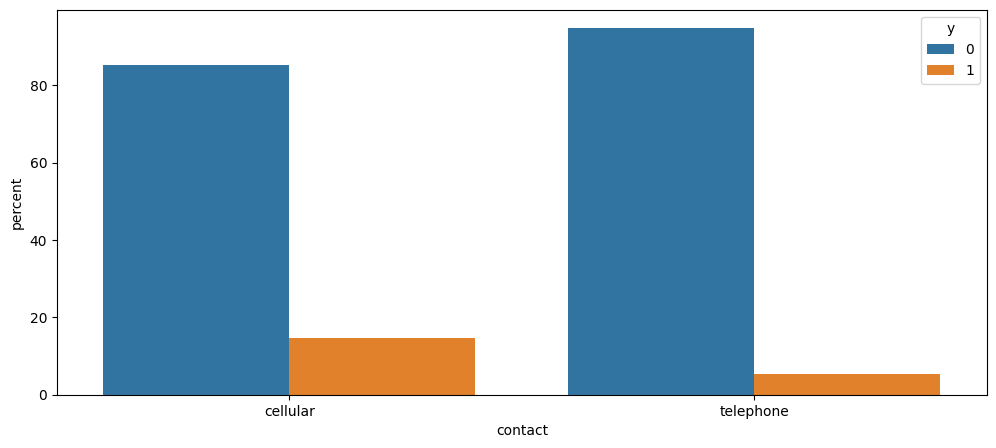

In [ ]:
plt.figure(figsize=(12,5))

# Calculate the percentages
df_percentages = df.groupby('contact')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
sns.barplot(x='contact', y='percent', hue='y', data=df_percentages)

plt.show()

Il semble que les étudiants soient la catégorie la plus encline à souscrire aux offres, étant donné qu'il s'agit probablement de réductions. Étant donné la situation financière relativement délicate des étudiants, il est logique de penser qu'ils souscrivent plus facilement.

<ipython-input-106-e7e5b2111862>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


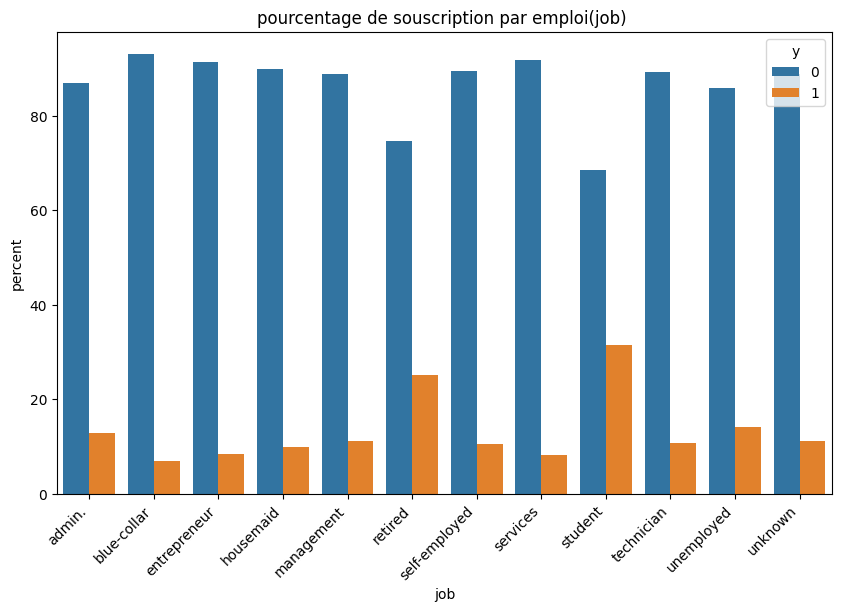

In [ ]:
colors = ['#FFB90F', '#33FFA8']
grouped = df.groupby('job')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Create a bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='job', y='percent', hue='y', data=grouped)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('pourcentage de souscription par emploi(job) ')
plt.show()

# 2 - Pre Processing



Encodage des données catégorielles en colonnes qui prennent les valeurs True ou False (0 ou 1) pour chaque catégorie.

In [7]:
df_encoded = pd.get_dummies(df, columns=cat_col)

In [ ]:
pd.set_option('display.max_columns', None)

In [8]:
#Encodage de la variable cible ( 0,1)
label_encoder = LabelEncoder()
df_encoded['y'] = label_encoder.fit_transform(df_encoded['y'])

In [9]:
#Suppression des colonnes 'unknown'
unknown_columns = ['job_unknown', 'marital_unknown','education_unknown','default_unknown',
                   'housing_unknown','loan_unknown','poutcome_nonexistent']

df_encoded.drop(unknown_columns, axis=1, inplace=True)

In [10]:
#Devision des données en données dépendantes et variable cible
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [11]:
#Devision des données en données d'entrainement et données de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Comme mentionné précédemment, notre variable cible est déséquilibrée. J'ai donc effectué une "data augmentation" afin de rééquilibrer les labels.

In [12]:
smote = SMOTE(random_state=123)
X_train1, y_train1 = smote.fit_resample(X_train, y_train)

Maintenant, nous avons une proportion égale de 1 et de 0 au niveau de notre variable cible.

In [13]:
y_train1.value_counts()/y_train1.shape[0]*100


,count
y,
0,50.0
1,50.0


# 3- Modeling


J'ai créé un dictionnaire regroupant les modèles les plus adaptés à mon objectif de classification binaire, afin de pouvoir les tester simultanément dans une boucle.

In [24]:
#Dictionnaire des modèles à testé
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced',random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced',random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier( random_state=42),
    'CatBoost': CatBoostClassifier( random_state=42, verbose=0)
}

=== Logistic Regression ===


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.91     10965
           1       0.44      0.89      0.59      1392

    accuracy                           0.86     12357
   macro avg       0.71      0.87      0.75     12357
weighted avg       0.92      0.86      0.88     12357

F1 Score: 0.5853
Accuracy: 0.8587
ROC AUC: 0.9365


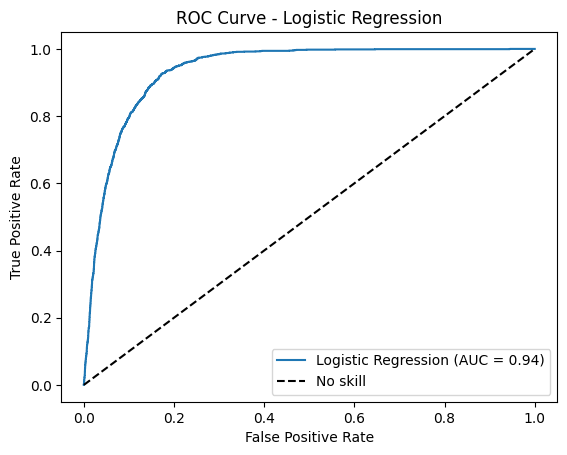

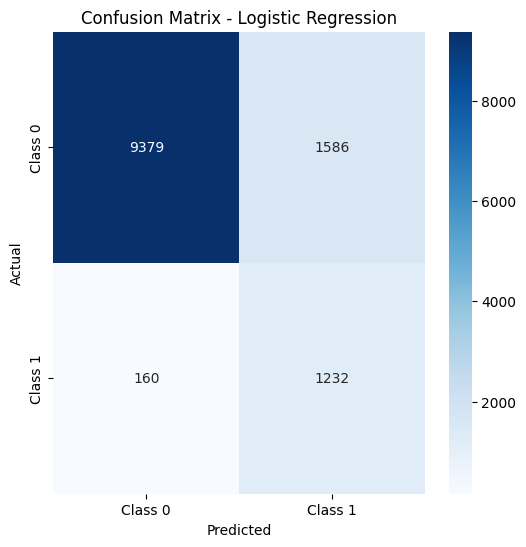

=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10965
           1       0.69      0.38      0.49      1392

    accuracy                           0.91     12357
   macro avg       0.81      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357

F1 Score: 0.4896
Accuracy: 0.9107
ROC AUC: 0.9420


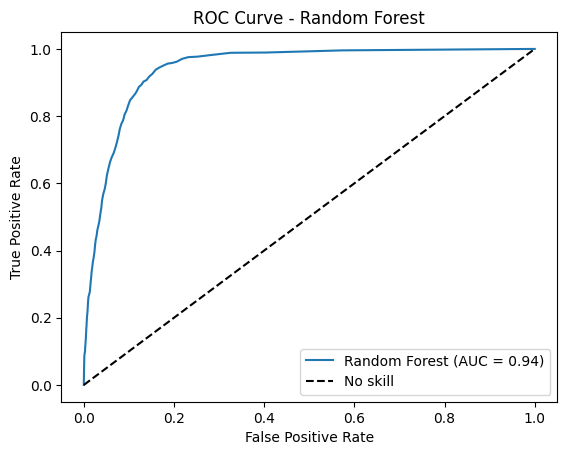

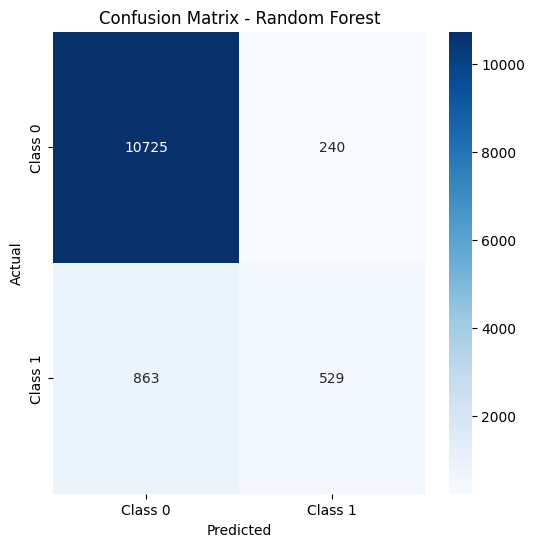

=== XGBoost ===


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.63      0.52      0.57      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357

F1 Score: 0.5736
Accuracy: 0.9123
ROC AUC: 0.9448


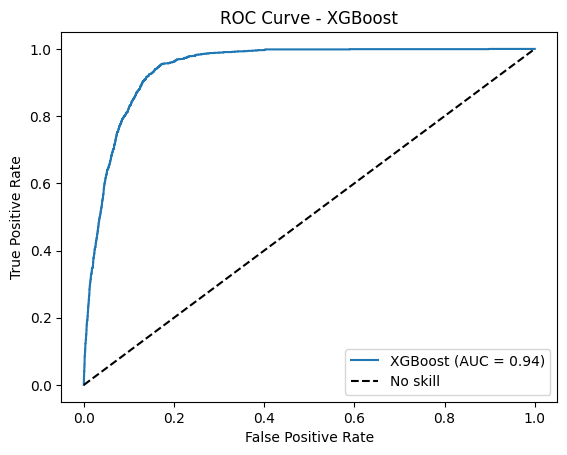

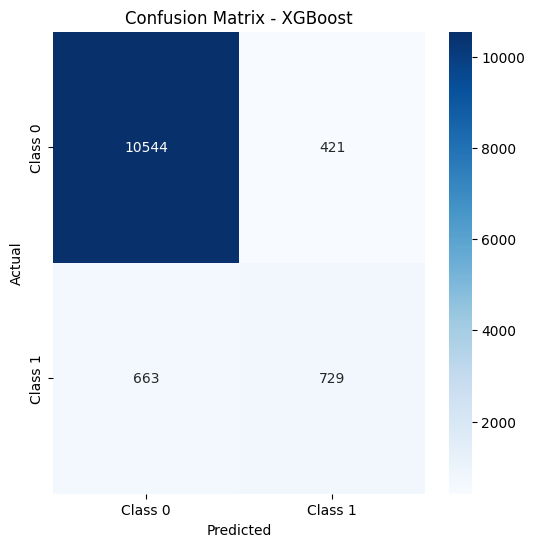

=== LightGBM ===
[LightGBM] [Info] Number of positive: 3248, number of negative: 25583
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 28831, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112657 -> initscore=-2.063889
[LightGBM] [Info] Start training from score -2.063889
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.66      0.55      0.60      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.76      0.78     12357
weighted avg       0.91      0.92      0.92     12357

F1 Score: 0.6045
Accuracy: 0.9183
ROC AUC: 0.9506


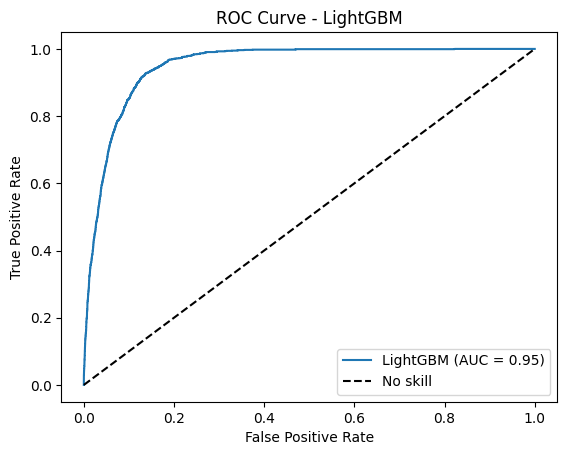

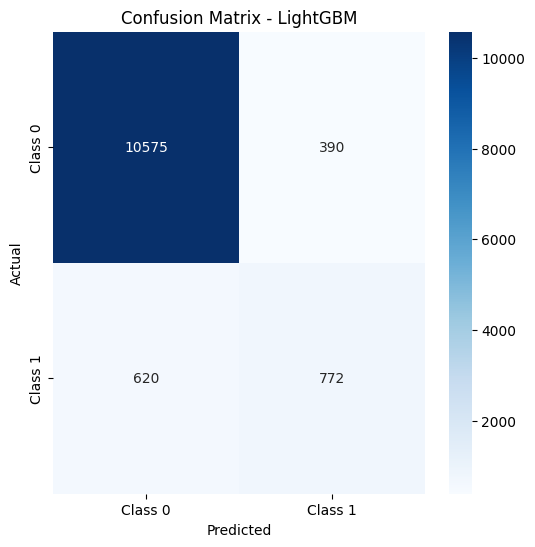

=== CatBoost ===
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.67      0.55      0.60      1392

    accuracy                           0.92     12357
   macro avg       0.81      0.76      0.78     12357
weighted avg       0.91      0.92      0.91     12357

F1 Score: 0.6002
Accuracy: 0.9182
ROC AUC: 0.9507


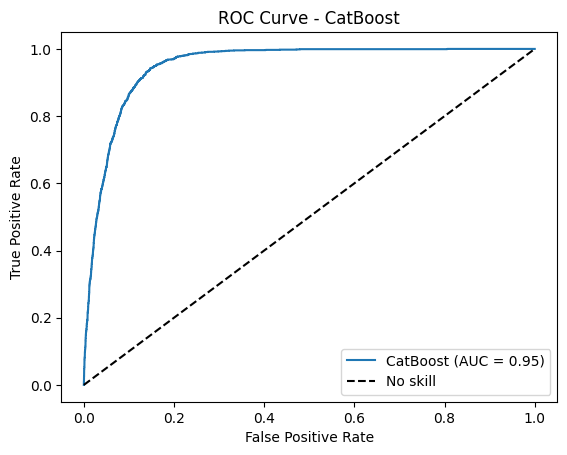

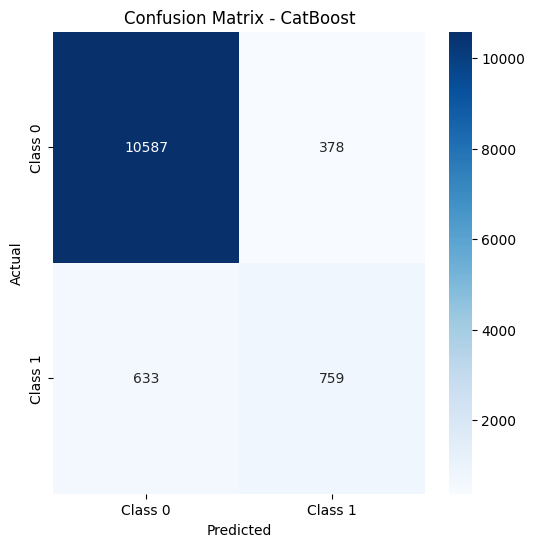

In [26]:


# Résultats pour chaque modèle
for model_name, model in models.items():
    print(f"=== {model_name} ===")

    # Entraînement
    model.fit(X_train, y_train)

    # Prédictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Évaluation
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Affichage des métriques
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"F1 Score: {f1:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Courbe ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="No skill")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



J'ai ensuite décidé d'entraîner les modèles sur les données dont la taille a été augmentée pour les rendre équilibrées, mais il semblerait que cette méthode ait fait perdre des points en F1 score à mes modèles.


=== Logistic Regression ===


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.63      0.48      0.55      1392

    accuracy                           0.91     12357
   macro avg       0.78      0.72      0.75     12357
weighted avg       0.90      0.91      0.91     12357

F1 Score: 0.5492
Accuracy: 0.9103
ROC AUC: 0.9139


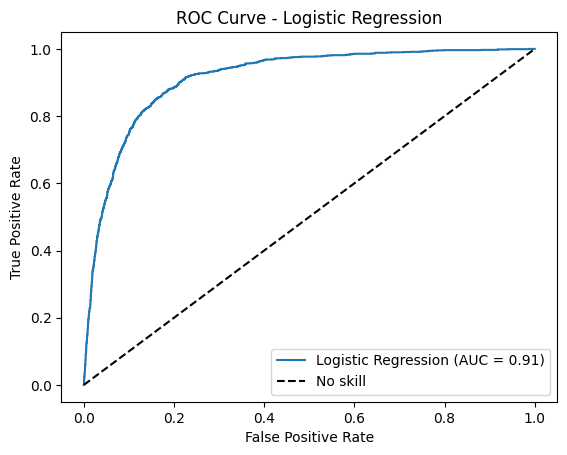

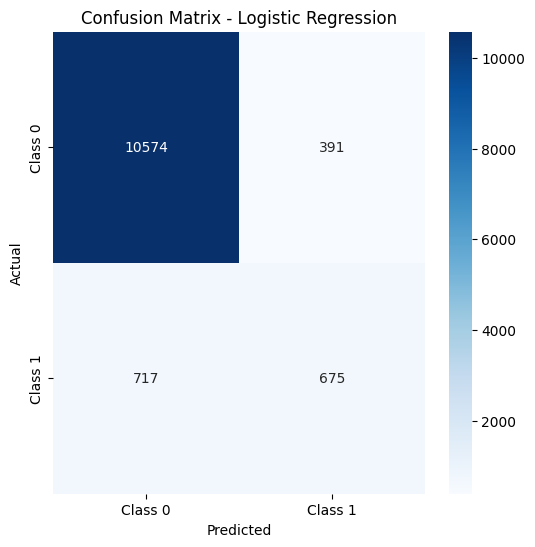

=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.64      0.52      0.57      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357

F1 Score: 0.5713
Accuracy: 0.9129
ROC AUC: 0.9415


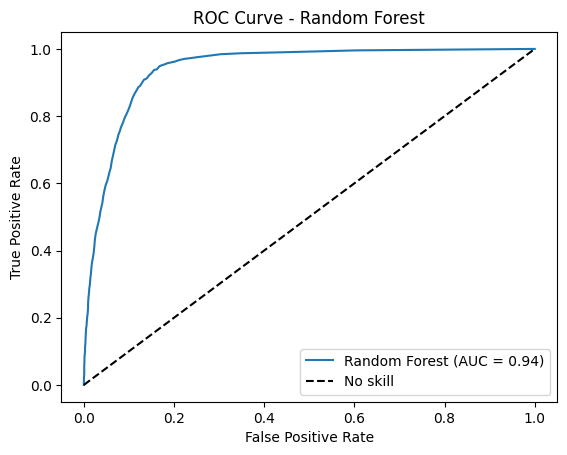

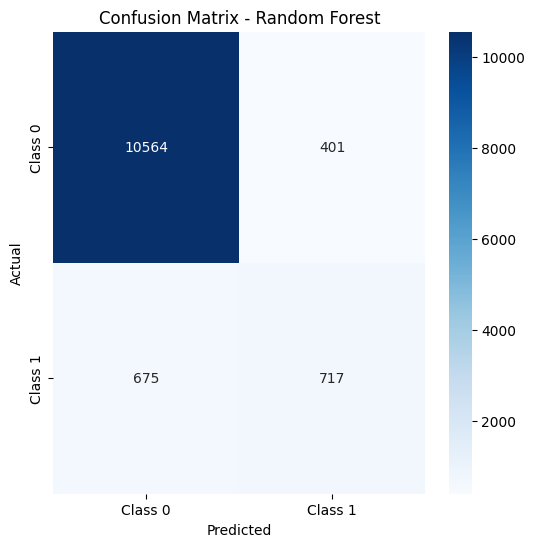

=== XGBoost ===


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:39:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10965
           1       0.64      0.57      0.60      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.76      0.78     12357
weighted avg       0.91      0.91      0.91     12357

F1 Score: 0.6011
Accuracy: 0.9147
ROC AUC: 0.9476


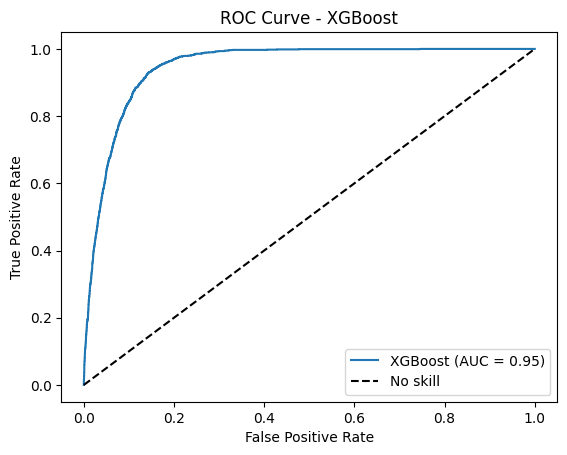

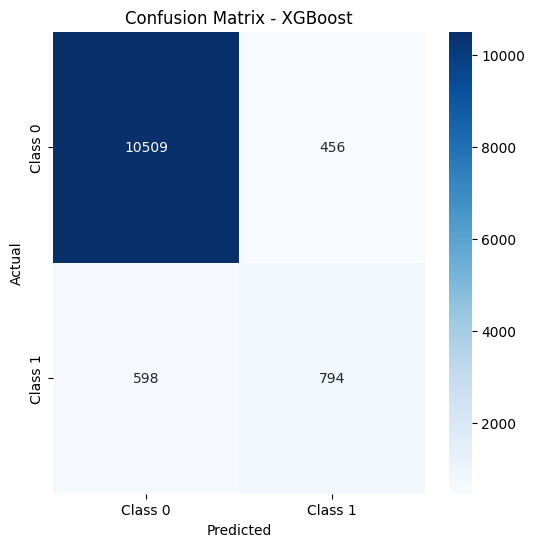

=== LightGBM ===
[LightGBM] [Info] Number of positive: 25583, number of negative: 25583
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1317
[LightGBM] [Info] Number of data points in the train set: 51166, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10965
           1       0.65      0.59      0.62      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.77      0.79     12357
weighted avg       0.92      0.92      0.92     12357

F1 Score: 0.6192
Accuracy: 0.9183
ROC AUC: 0.9497


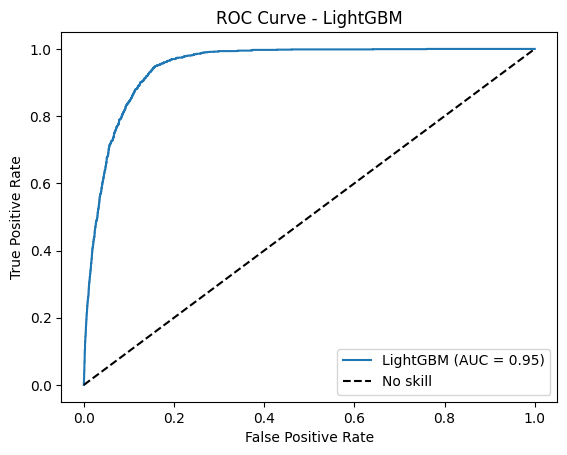

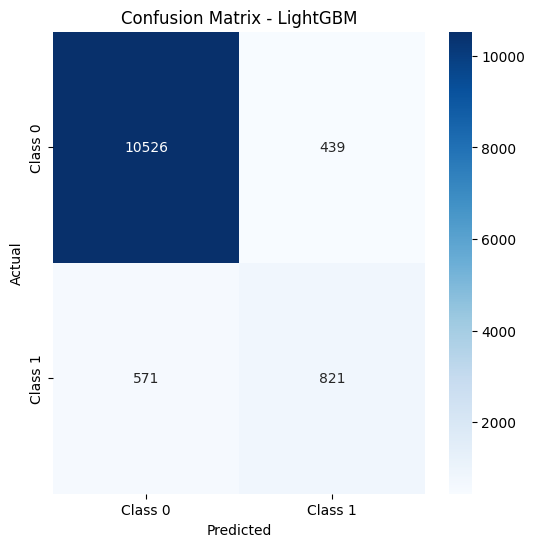

=== CatBoost ===
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10965
           1       0.65      0.57      0.61      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.77      0.78     12357
weighted avg       0.91      0.92      0.92     12357

F1 Score: 0.6100
Accuracy: 0.9175
ROC AUC: 0.9498


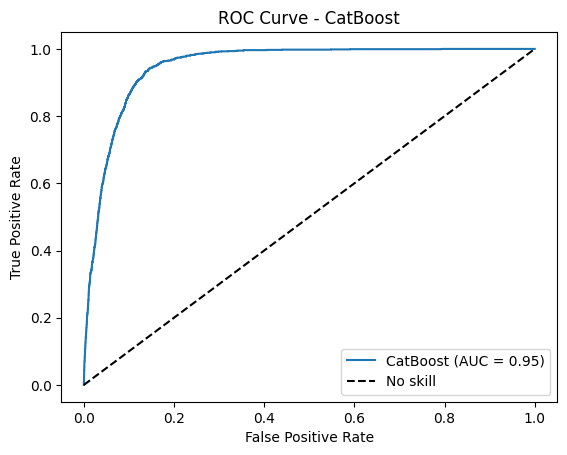

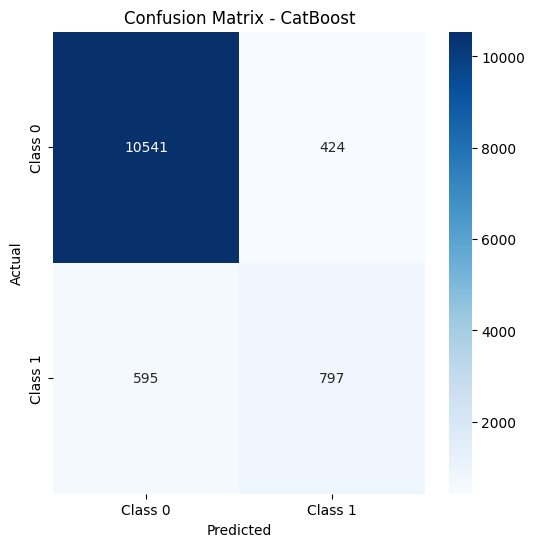

In [37]:
# Résultats pour chaque modèle
for model_name, model in models.items():
    print(f"=== {model_name} ===")

    # Entraînement
    model.fit(X_train1, y_train1)

    # Prédictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Évaluation
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Affichage des métriques
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"F1 Score: {f1:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Courbe ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="No skill")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Les meilleurs modèles ont été CatBoost et LightGBM. J'ai donc décidé de réaliser un grid search sur ces deux modèles afin de trouver les meilleurs hyperparamètres.


Best parameters for CatBoost:
{'depth': 7, 'iterations': 200, 'learning_rate': 0.1}
Best F1 Score for CatBoost: 0.5824605401151419

Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.67      0.54      0.60      1392

    accuracy                           0.92     12357
   macro avg       0.81      0.75      0.78     12357
weighted avg       0.91      0.92      0.91     12357

F1 Score for CatBoost: 0.5968127490039841


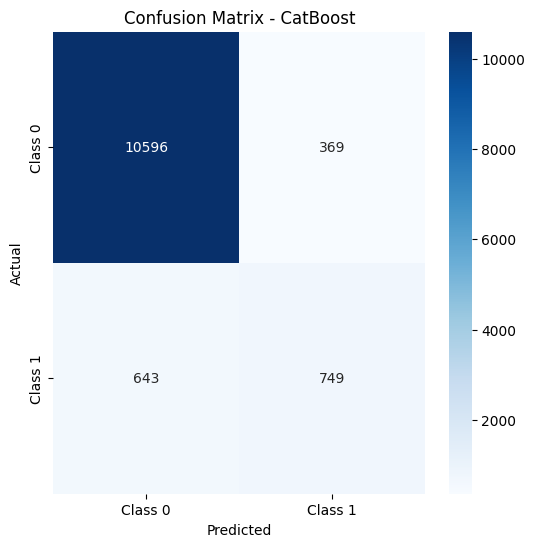

[LightGBM] [Info] Number of positive: 2598, number of negative: 20466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 23064, number of used features: 85
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112643 -> initscore=-2.064023
[LightGBM] [Info] Start training from score -2.064023
[LightGBM] [Info] Number of positive: 2599, number of negative: 20466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 23065, number of used features: 85
[LightGBM] [Info] [bin

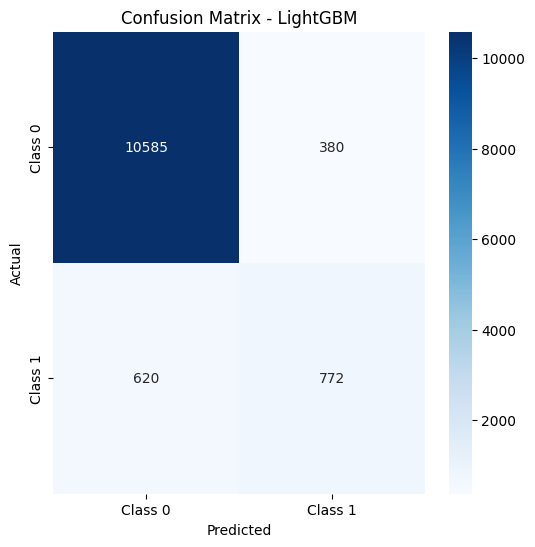

In [33]:

# Paramètres à tester pour CatBoost
catboost_params = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7]
}

# Paramètres à tester pour LightGBM
lightgbm_params = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# GridSearchCV pour CatBoost
catboost_model = CatBoostClassifier(verbose=0)
catboost_grid = GridSearchCV(catboost_model, param_grid=catboost_params, cv=5, scoring='f1')
catboost_grid.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score pour CatBoost
print("Best parameters for CatBoost:")
print(catboost_grid.best_params_)
print("Best F1 Score for CatBoost:", catboost_grid.best_score_)

# Prédictions sur X_test
y_pred_catboost = catboost_grid.best_estimator_.predict(X_test)

# Matrice de confusion et rapport de classification pour CatBoost
print("\nClassification Report for CatBoost:")
print(classification_report(y_test, y_pred_catboost))
print("F1 Score for CatBoost:", f1_score(y_test, y_pred_catboost))

# Affichage de la matrice de confusion pour CatBoost
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_catboost, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - CatBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# GridSearchCV pour LightGBM
lightgbm_model = LGBMClassifier()
lightgbm_grid = GridSearchCV(lightgbm_model, param_grid=lightgbm_params, cv=5, scoring='f1')
lightgbm_grid.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score pour LightGBM
print("\nBest parameters for LightGBM:")
print(lightgbm_grid.best_params_)
print("Best F1 Score for LightGBM:", lightgbm_grid.best_score_)

# Prédictions sur X_test
y_pred_lightgbm = lightgbm_grid.best_estimator_.predict(X_test)

# Matrice de confusion et rapport de classification pour LightGBM
print("\nClassification Report for LightGBM:")
print(classification_report(y_test, y_pred_lightgbm))
print("F1 Score for LightGBM:", f1_score(y_test, y_pred_lightgbm))

# Affichage de la matrice de confusion pour LightGBM
conf_matrix_lightgbm = confusion_matrix(y_test, y_pred_lightgbm)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_lightgbm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

J'ai ensuite décidé de voir s'il était possible d'augmenter le F1 score en modifiant le seuil de classification et en gardant le meilleur. Pour cela, j'ai défini la fonction 'find_best_threshold', ce qui a permis d'améliorer le score F1 de tous les modèles d'environ 0,2 à 0,5 %.

In [38]:
# Fonction pour ajuster le seuil
def find_best_threshold(y_proba, y_test):
    best_f1 = 0
    best_threshold = 0
    thresholds = np.arange(0.0, 1.1, 0.05)

    # Tester tous les seuils
    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Logistic Regression ===
Classification Report (with optimal threshold):
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     10965
           1       0.53      0.76      0.63      1392

    accuracy                           0.90     12357
   macro avg       0.75      0.84      0.78     12357
weighted avg       0.92      0.90      0.91     12357

F1 Score (with optimal threshold): 0.6255
Accuracy (with optimal threshold): 0.8979
ROC AUC: 0.9365


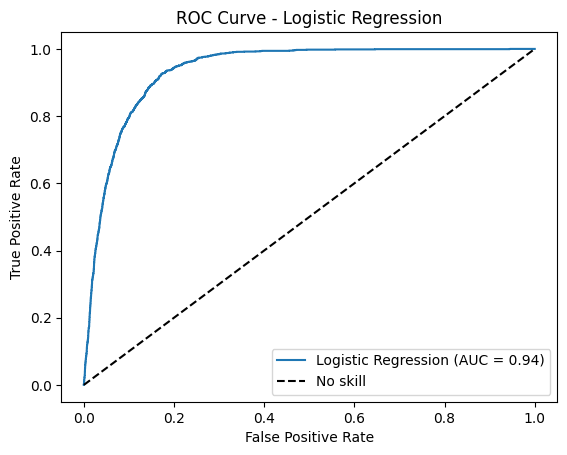

Best threshold for Logistic Regression: 0.70
=== Random Forest ===
Classification Report (with optimal threshold):
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     10965
           1       0.52      0.82      0.64      1392

    accuracy                           0.90     12357
   macro avg       0.75      0.86      0.79     12357
weighted avg       0.92      0.90      0.90     12357

F1 Score (with optimal threshold): 0.6373
Accuracy (with optimal threshold): 0.8954
ROC AUC: 0.9420


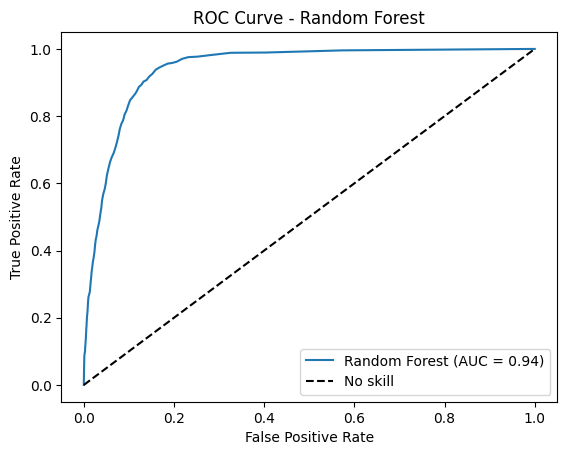

Best threshold for Random Forest: 0.25


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:16:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost ===
Classification Report (with optimal threshold):
              precision    recall  f1-score   support

           0       0.97      0.92      0.95     10965
           1       0.56      0.75      0.64      1392

    accuracy                           0.91     12357
   macro avg       0.76      0.84      0.79     12357
weighted avg       0.92      0.91      0.91     12357

F1 Score (with optimal threshold): 0.6424
Accuracy (with optimal threshold): 0.9056
ROC AUC: 0.9448


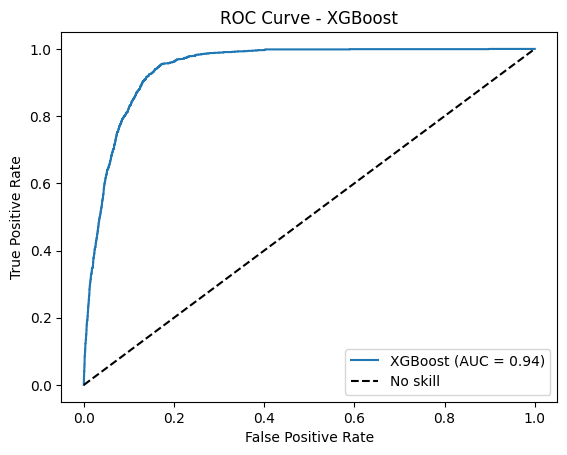

Best threshold for XGBoost: 0.30
[LightGBM] [Info] Number of positive: 3248, number of negative: 25583
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 28831, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112657 -> initscore=-2.063889
[LightGBM] [Info] Start training from score -2.063889
=== LightGBM ===
Classification Report (with optimal threshold):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     10965
           1       0.59      0.75      0.66      1392

    accuracy                           0.91     12357
   macro avg       0.78      0.84      0.81     12357
weighted avg       0.93      0.91      0.92     12357

F1 Score (with opti

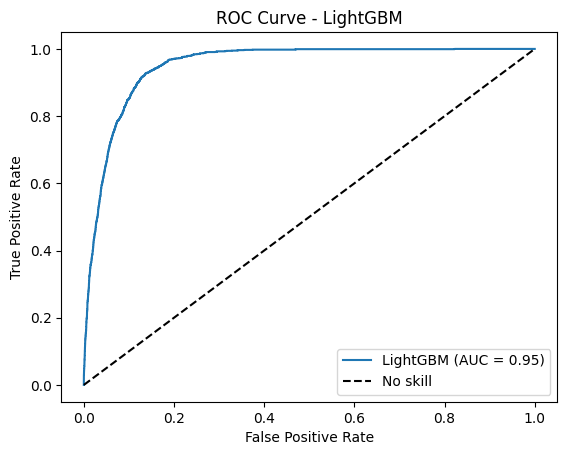

Best threshold for LightGBM: 0.35
=== CatBoost ===
Classification Report (with optimal threshold):
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     10965
           1       0.55      0.83      0.66      1392

    accuracy                           0.90     12357
   macro avg       0.76      0.87      0.80     12357
weighted avg       0.93      0.90      0.91     12357

F1 Score (with optimal threshold): 0.6610
Accuracy (with optimal threshold): 0.9039
ROC AUC: 0.9507


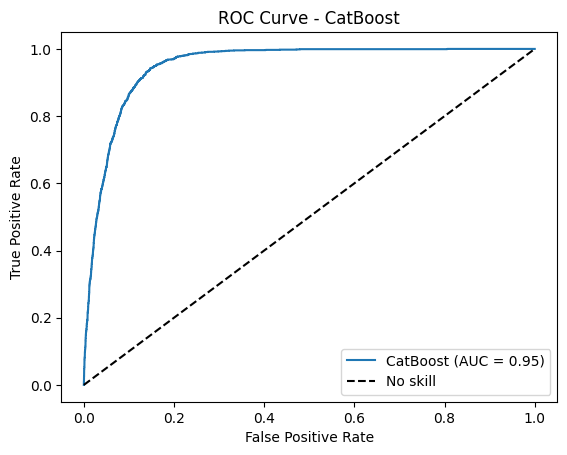

Best threshold for CatBoost: 0.25


In [39]:
# Résultats pour chaque modèle
for model_name, model in models.items():



    # Entraînement du modèle
    model.fit(X_train, y_train)

    # Prédictions et probabilités
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Trouver le meilleur seuil
    best_threshold = find_best_threshold(y_proba, y_test)

    # Appliquer le seuil optimal
    y_pred_optimal = (y_proba >= best_threshold).astype(int)

    # Calcul des métriques avec le seuil optimal
    f1_optimal = f1_score(y_test, y_pred_optimal)
    acc_optimal = accuracy_score(y_test, y_pred_optimal)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Affichage des métriques
    print(f"=== {model_name} ===")
    print("Classification Report (with optimal threshold):")
    print(classification_report(y_test, y_pred_optimal))
    print(f"F1 Score (with optimal threshold): {f1_optimal:.4f}")
    print(f"Accuracy (with optimal threshold): {acc_optimal:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Courbe ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="No skill")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Best threshold for {model_name}: {best_threshold:.2f}")